# Notebook to merge and calculate T XH2O P and D for Pre-Post Caldera project at Kilauea
- merge all sample datasets
- calculates SO2 mol%, T, XH2O, P and D
- exports this final dataset to excel for plotting in a separate notebook

## 1. Import packages and setup folders and paths

### Install packages if not installed

In [1]:
#%pip install --upgrade DiadFit
#%pip install Thermobar

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
import os
import pickle

### Setup folders and data paths

In [3]:
# This is to make sure the code runs regardless of operating system
if os.name=='posix':
    slash='/'
else:
    slash='\\'

# Set master folder
MasterFolder=os.path.dirname(os.getcwd())

# Create folder to save full datasets

compilation_folder=MasterFolder +slash+"Data_processing_notebooks"+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

## 2. Merge all the datasets together

### Import the Fully merged SWRZ data


In [4]:
KL_SWRZ=pd.read_excel(MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_SWRZ'+slash+'Notebook_Compiled_data'+slash+'SWRZ_Final_data_wEBSD.xlsx')

KL_SWRZ =KL_SWRZ.loc[:, ~KL_SWRZ.columns.str.contains('Unnamed')].copy()

KL_SWRZ.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,GB Length/Sqrt Size,Total GB length,Tilt length,Twist length,Perc Tilt,Perc Twist,Perc unclassified,Divangle,Deformed,Day_EBSDdata
0,KL0919-010-A,0.119384,0.004053,0.001334,0.003827,103.051548,0.003366,0.001044,0.003205,11.971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KL0919-010-B,0.105191,0.008116,0.007167,0.003809,103.015728,0.018087,0.001047,0.018082,11.965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KL0919-010-C-meltfilm,0.090413,0.004864,0.003034,0.003801,102.978432,0.007658,0.001050,0.007596,11.966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KL0919-011-A,0.141729,0.004629,0.002532,0.003876,103.107941,0.006389,0.001061,0.006309,11.956,...,0.979728,56.64658,50.451855,5.15671,89.064256,9.103303,1.83244,NaN,Uncertain,1.0
4,KL0919-011-C,0.156472,0.004005,0.000818,0.003921,103.145147,0.002064,0.001068,0.001769,11.954,...,0.979728,56.64658,50.451855,5.15671,89.064256,9.103303,1.83244,NaN,Uncertain,1.0


### Import the December 2024 Data
- Remember to update once I have EDS and EBSD

In [5]:
KD24=pd.read_excel(MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_KS24-628'+slash+'Notebook_Compiled_data'+slash+'KD24_Raman_averaged.xlsx')
KD24 =KD24.loc[:, ~KD24.columns.str.contains('Unnamed')]

KD24.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,lower_values_Raman_STD,upper_values_Raman_STD,Mount_Raman_STD,Name_on_SEM_Raman_STD,Notes regarding SEM matching_Raman_STD,EBSD_simple_name_Raman_STD,EBSD_grainID_Raman_STD,EBSDname+grainID_Raman_STD,EBSD_comment_Raman_STD,averaged?
0,FG04-A1-4-end_r5,0.691934,0.003428,0.002393,0.002391,104.330131,0.004693,0.000555,0.004667,6.016000,...,6.701971e-08,9.615113e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,FG04-A1-4-start_r1,0.688678,0.004276,0.003481,0.002390,104.323735,0.006836,0.000534,0.006827,6.001667,...,3.127646e-06,3.182375e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,KD24_c001_a1_FIA_r1,0.086661,0.007504,0.006332,0.003802,102.968963,0.015979,0.000515,0.016004,9.912000,...,1.172850e-06,1.192637e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,KD24_c001_a1_FIB,0.062668,0.006605,0.005391,0.003817,102.908411,0.013605,0.000513,0.013625,9.855000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,KD24_c001_a1_FIC,0.101646,0.009129,0.008297,0.003806,103.006781,0.020940,0.000509,0.020980,9.836000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


### Import the 2020 Data
- Remember to update once I have EDS and EBSD

In [6]:
K20=pd.read_excel(MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_KS20-527'+slash+'Notebook_Compiled_data'+slash+'K20_Raman_averaged.xlsx')
K20 =K20.loc[:, ~K20.columns.str.contains('Unnamed')]

K20.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values_Raman_STD,lower_values_Raman_STD,upper_values_Raman_STD,Name_on_SEM_Raman_STD,Notes regarding SEM matching_Raman_STD,EBSD_simple_name_Raman_STD,EBSD_grainID_Raman_STD,EBSDname+grainID_Raman_STD,EBSD_comment_Raman_STD,averaged?
0,FG04-A1-4-100X-start_r4,0.696462,0.006099,0.005609,0.002392,104.338995,0.010976,0.001514,0.010895,5.984000,...,3.052248e-07,3.386316e-07,2.718187e-07,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,FG04-A1-4-50X-end_r7,0.688075,0.004044,0.003235,0.002390,104.322548,0.006358,0.001614,0.006150,6.040000,...,2.218869e-07,1.772310e-07,2.665431e-07,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,FG04-A1-4-50X-start_r1,0.690809,0.003109,0.001986,0.002391,104.327891,0.003898,0.001528,0.003593,5.979667,...,2.576636e-07,2.905995e-07,2.247281e-07,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,FG04-A1-4-end_r4,0.694369,0.005155,0.004541,0.002392,104.334870,0.008904,0.000712,0.008893,6.004000,...,3.395517e-07,3.847807e-07,2.943229e-07,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,FG04-A1-4-start_r1,0.693323,0.004397,0.003690,0.002391,104.332851,0.007232,0.000650,0.007218,6.092667,...,4.024905e-07,3.745016e-07,4.304802e-07,NaN,NaN,NaN,NaN,NaN,NaN,Yes


### Import the Ulu Data
- Remember to update once I have it

### Now let's merge all the datasets together
- Eventually, at this point this means all the complete Raman+EDS+EBSD datasets for each eruption
- Add other Ulu once I analyze
- Filter out the standards and re-export

In [23]:
## Combine samples, export (includes the standards)
combo_df=pd.concat([KL_SWRZ,KD24,K20],axis=0).dropna(axis=0,how='all').dropna(axis=1,how='all')
# combo_df=combo_df.reset_index(drop=True)

combo_df.to_excel(compilation_folder+slash+'All_samples_combined_with_Standards.xlsx')

## Filter standards and export both
standards=combo_df[combo_df['filename'].str.contains('FG|Fo|FO')]
combo_df=combo_df[~combo_df['filename'].str.contains('FG|Fo|FO')]
combo_df.to_excel(compilation_folder+slash+'All_samples_combined_No_Standards.xlsx')
standards.to_excel(compilation_folder+slash+'All_standards_only.xlsx')

combo_df.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Total GB length,Tilt length,Twist length,Perc Tilt,Perc Twist,Perc unclassified,Divangle,Deformed,Day_EBSDdata,Standard
0,KL0919-010-A,0.119384,0.004053,0.001334,0.003827,103.051548,0.003366,0.001044,0.003205,11.971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KL0919-010-B,0.105191,0.008116,0.007167,0.003809,103.015728,0.018087,0.001047,0.018082,11.965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KL0919-010-C-meltfilm,0.090413,0.004864,0.003034,0.003801,102.978432,0.007658,0.001050,0.007596,11.966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KL0919-011-A,0.141729,0.004629,0.002532,0.003876,103.107941,0.006389,0.001061,0.006309,11.956,...,56.64658,50.451855,5.15671,89.064256,9.103303,1.83244,NaN,Uncertain,1.0,NaN
4,KL0919-011-C,0.156472,0.004005,0.000818,0.003921,103.145147,0.002064,0.001068,0.001769,11.954,...,56.64658,50.451855,5.15671,89.064256,9.103303,1.83244,NaN,Uncertain,1.0,NaN


## 3. Calculate SO2 mol % from Raman

In [24]:
combo_df['SO2 mol%']=pf.calculate_mole_fraction_2comp(peak_area_a=combo_df['Peak_Area_SO2'], peak_area_b=combo_df['Diad1_Voigt_Area']+combo_df['Diad2_Voigt_Area'],
                                  cross_section_a=5.3, cross_section_b=1.4+0.89, instrument_eff_a=1, instrument_eff_b=1)['% A']

#combo_df['Fo']=(combo_df['MgO']/40.3044)/((combo_df['MgO']/40.3044)+(combo_df['FeOt']/71.844))

## 4. Calculate the Temperature from olivine only thermometer
- This uses the T vs Fo relationship from DeVitre and Wieser (2024) GPL for Kilauea

### A. Load the Temp vs Fo correction relationship for Kilauea

In [25]:
with open(os.getcwd()+slash+'T and XH2O pickles'+slash+'TempFoModel.pkl', 'rb') as f:
    Pf_TempFo = pickle.load(f)

### B. Calculate Temperature from Fo and plot the distribution
- When no EDS data is available we use the mean T from the dataset (once I have other samples I can maybe do a mean per sample)
- We establish the error on T (+- 50K for now)

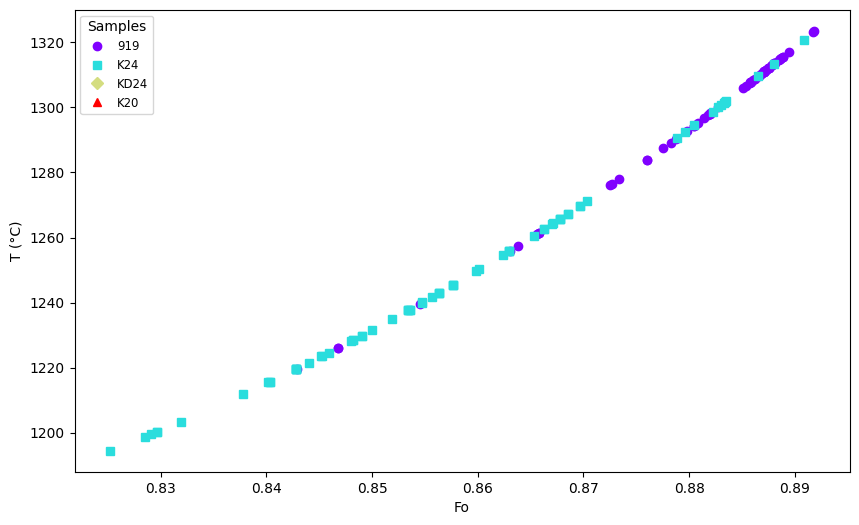

In [26]:
combo_df['Temp_from_Fo_all']=Pf_TempFo(combo_df['Fo_Ol'])
MeanT=np.nanmean(combo_df['Temp_from_Fo_all'])
combo_df['Temp_from_Fo_all'] = combo_df['Temp_from_Fo_all'].fillna(MeanT)

# Create Temp error column, we use 50K +- for now.
combo_df['Temp_error'] = np.where(combo_df['Temp_from_Fo_all'] == MeanT, 50, 50)

####### Now let's plot the Temp vs Fo to visualize the distribution
unique_samples = combo_df['Sample'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_samples)))
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x', 'X']  # List of markers

if len(unique_samples) > len(markers):
    print("Warning: More samples than available marker types; some markers will repeat.")

plt.figure(figsize=(10, 6))

for sample, color, marker in zip(unique_samples, colors, markers * (len(unique_samples) // len(markers) + 1)):
    sample_data = combo_df[combo_df['Sample'] == sample]
    plt.plot(
        sample_data['Fo_Ol'], 
        sample_data['Temp_from_Fo_all'], 
        linestyle='none', 
        marker=marker, 
        label=sample, 
        color=color
    )

plt.xlabel('Fo')
plt.ylabel('T (°C)')

plt.legend(title="Samples", loc="best", fontsize='small')
plt.show()

## 5. Calculate the XH2O in the fluid inclusions
- This uses the relationships from DeVitre and Wieser (2024) GPL
- First we import the pickles (min, average, max - see paper for details)
- Then we calculate a first approximation of pressure using pure CO2 EOS, and calculate a first approximation of XH2O from this pressure
- After that we recalculate the pressure using mixed CO2-H2O EOS from Duan and Zhang 2006
- We recalculate XH2O from this new pressure
- We recalculate pressure and XH2O one more time to ensure it has not varied

### A. First, import the pickles (polynomial relationships)

In [27]:
pf_files = ["PXH2O_min.pkl", "PXH2O_max.pkl", "PXH2O_av.pkl"]
Pf_functions = {}

for file_name, label in zip(pf_files, ["Pf_min", "Pf_max", "Pf_av"]):
    with open(os.path.join(os.getcwd(), "T and XH2O pickles", file_name), 'rb') as f:
        Pf_functions[label] = pickle.load(f)

Pf_min = Pf_functions["Pf_min"]
Pf_max = Pf_functions["Pf_max"]
Pf_av = Pf_functions["Pf_av"]

# And its defined as XH2O_av=1-Pf_med(P_SW96['P_MPa'])

### B. Calculate the first approximation XH2O

#### First, calculate approximated pressure with pure CO2 EOS

In [28]:
combo_df['P_kbar_pureCO2_firstapprox'] =pf.calculate_P_for_rho_T(CO2_dens_gcm3=combo_df['Density g/cm3'],
                                                                        T_K=combo_df['Temp_from_Fo_all'] + 273.15,
                                                                        EOS='SW96')['P_kbar']
combo_df.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Perc Twist,Perc unclassified,Divangle,Deformed,Day_EBSDdata,Standard,SO2 mol%,Temp_from_Fo_all,Temp_error,P_kbar_pureCO2_firstapprox
0,KL0919-010-A,0.119384,0.004053,0.001334,0.003827,103.051548,0.003366,0.001044,0.003205,11.971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1311.014317,50,0.389537
1,KL0919-010-B,0.105191,0.008116,0.007167,0.003809,103.015728,0.018087,0.001047,0.018082,11.965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1311.014317,50,0.339539
2,KL0919-010-C-meltfilm,0.090413,0.004864,0.003034,0.003801,102.978432,0.007658,0.001050,0.007596,11.966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1311.014317,50,0.288622
3,KL0919-011-A,0.141729,0.004629,0.002532,0.003876,103.107941,0.006389,0.001061,0.006309,11.956,...,9.103303,1.83244,NaN,Uncertain,1.0,NaN,NaN,1315.580801,50,0.471972
4,KL0919-011-C,0.156472,0.004005,0.000818,0.003921,103.145147,0.002064,0.001068,0.001769,11.954,...,9.103303,1.83244,NaN,Uncertain,1.0,NaN,NaN,1315.580801,50,0.527202


#### Next, we calculate the XH2O first approximation

In [29]:
# Create function to calculate XH2O from pickles that were loaded,
# If XH2O is negative we assign 0 to it
def calculate_XH2O(P_kbar, Pf_func):
    XH2O = 1 - Pf_func(P_kbar * 100)
    XH2O[XH2O < 0] = 0
    return XH2O

combo_df['XH2O_av_firstapprox'] = calculate_XH2O(combo_df['P_kbar_pureCO2_firstapprox'], Pf_av)
combo_df['XH2O_min_firstapprox'] = calculate_XH2O(combo_df['P_kbar_pureCO2_firstapprox'], Pf_min)
combo_df['XH2O_max_firstapprox'] = calculate_XH2O(combo_df['P_kbar_pureCO2_firstapprox'], Pf_max)

### C. Now, we iterate calculations using mixed H2O-CO2 EOS of Duan and Zhang
- We do 3 iterations: this means P, XH2O; P2, XH2O2;P3, XH2O final

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,P_kbar_mixCO2_DZ06_no_Hloss_max_iteration2,XH2O_av_iteration2,XH2O_min_iteration2,XH2O_max_iteration2,P_kbar_mixCO2_DZ06_no_Hloss_av_iteration3,P_kbar_mixCO2_DZ06_no_Hloss_min_iteration3,P_kbar_mixCO2_DZ06_no_Hloss_max_iteration3,XH2O_av_iteration3_final,XH2O_min_iteration3_final,XH2O_max_iteration3_final
0,KL0919-010-A,0.119384,0.004053,0.001334,0.003827,103.051548,0.003366,0.001044,0.003205,11.971,...,0.435324,0.077840,0.038064,0.116583,0.419187,0.403058,0.436275,0.077798,0.038062,0.116321
1,KL0919-010-B,0.105191,0.008116,0.007167,0.003809,103.015728,0.018087,0.001047,0.018082,11.965,...,0.385581,0.088536,0.043628,0.132274,0.369529,0.353328,0.386896,0.088466,0.043624,0.131807
2,KL0919-010-C-meltfilm,0.090413,0.004864,0.003034,0.003801,102.978432,0.007658,0.001050,0.007596,11.966,...,0.334857,0.102269,0.050615,0.152631,0.318812,0.302532,0.336563,0.102163,0.050611,0.151868
3,KL0919-011-A,0.141729,0.004629,0.002532,0.003876,103.107941,0.006389,0.001061,0.006309,11.956,...,0.517902,0.065174,0.031243,0.098318,0.501296,0.485004,0.518385,0.065160,0.031242,0.098236
4,KL0919-011-C,0.156472,0.004005,0.000818,0.003921,103.145147,0.002064,0.001068,0.001769,11.954,...,0.573989,0.059469,0.028010,0.090308,0.556751,0.540025,0.574267,0.059462,0.028010,0.090276


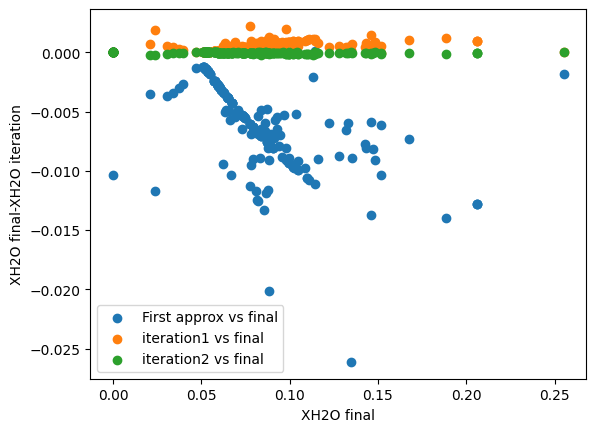

In [30]:
# First we make a function to calculate iterations of P using Duan and Zhang EOS
def calculate_entrapment_pressure(df, XH2O_col):
    return pf.calculate_entrapment_P_XH2O(
        XH2O=df[XH2O_col],
        CO2_dens_gcm3=df['Density g/cm3'],
        T_K=df['Temp_from_Fo_all'] + 273.15,
        T_K_ambient=37 + 273.15,
        fast_calcs=False,
        Hloss=True
    )['P_kbar_mixCO2_DZ06_no_Hloss']

# Then we iterate 3 times to get the final XH2O
for i in range(1, 4):
    if i == 1:
        suffix = '_firstapprox'
    else:
        suffix = f'_iteration{i - 1}'

    # Calculate pressures
    combo_df[f'P_kbar_mixCO2_DZ06_no_Hloss_av_iteration{i}'] = calculate_entrapment_pressure(combo_df, f'XH2O_av{suffix}')
    combo_df[f'P_kbar_mixCO2_DZ06_no_Hloss_min_iteration{i}'] = calculate_entrapment_pressure(combo_df, f'XH2O_min{suffix}')
    combo_df[f'P_kbar_mixCO2_DZ06_no_Hloss_max_iteration{i}'] = calculate_entrapment_pressure(combo_df, f'XH2O_max{suffix}')

    # Calculate XH2O
    combo_df[f'XH2O_av_iteration{i}{"" if i < 3 else "_final"}'] = calculate_XH2O(combo_df[f'P_kbar_mixCO2_DZ06_no_Hloss_av_iteration{i}'], Pf_av)
    combo_df[f'XH2O_min_iteration{i}{"" if i < 3 else "_final"}'] = calculate_XH2O(combo_df[f'P_kbar_mixCO2_DZ06_no_Hloss_min_iteration{i}'], Pf_min)
    combo_df[f'XH2O_max_iteration{i}{"" if i < 3 else "_final"}'] = calculate_XH2O(combo_df[f'P_kbar_mixCO2_DZ06_no_Hloss_max_iteration{i}'], Pf_max)


plt.scatter(combo_df['XH2O_av_iteration3_final'],combo_df['XH2O_av_iteration3_final']-combo_df['XH2O_av_firstapprox'],label='First approx vs final')
plt.scatter(combo_df['XH2O_av_iteration3_final'],combo_df['XH2O_av_iteration3_final']-combo_df['XH2O_av_iteration1'],label='iteration1 vs final')
plt.scatter(combo_df['XH2O_av_iteration3_final'],combo_df['XH2O_av_iteration3_final']-combo_df['XH2O_av_iteration2'],label='iteration2 vs final')
plt.xlabel("XH2O final")
plt.ylabel("XH2O final-XH2O iteration")
plt.legend()

combo_df.head()

## 6. Calculate final pressure and depth using Duan and Zhang EOS and propagate uncertainty 
- We use Duan and Zhang mixed fluid EOS (2006) and XH2O to calculate pressure (error on XH2O is difference between min and max XH2O halved)
- Temperature from Fo or mean if not available (Temperature error of +- 50K)
- Denlinger Lerner crustal model

In [44]:
# ## Before doing this, to ensure proper merging we have to create a new column in combo_df
combo_df['filename_4merge']=combo_df['filename']+"_"+combo_df['date_object'].astype('str')#+combo_df.index.map(str)

MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=combo_df['Temp_from_Fo_all']+273.15,
error_T_K=combo_df['Temp_error'], error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=combo_df['Density g/cm3'],error_CO2_dens=combo_df['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=combo_df['XH2O_av_iteration3_final'], error_XH2O=pd.Series(0.5*np.abs(combo_df['XH2O_max_iteration3_final']-combo_df['XH2O_min_iteration3_final'])), error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=combo_df['filename_4merge'],
model='denlinger_lerner',
N_dup=500, fig_i=0, plot_figure=False)

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


### And now, merge it back into the dataframe

In [46]:
PDframe=MC_Av_rho_T_df_B['Filename'].rename("filename_4merge")

combo_df_wcalcs=combo_df.merge(PDframe, on='filename_4merge', how='left')
combo_df_wcalcs

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,XH2O_av_iteration2,XH2O_min_iteration2,XH2O_max_iteration2,P_kbar_mixCO2_DZ06_no_Hloss_av_iteration3,P_kbar_mixCO2_DZ06_no_Hloss_min_iteration3,P_kbar_mixCO2_DZ06_no_Hloss_max_iteration3,XH2O_av_iteration3_final,XH2O_min_iteration3_final,XH2O_max_iteration3_final,filename_4merge
0,KL0919-010-A,0.119384,0.004053,0.001334,0.003827,103.051548,0.003366,0.001044,0.003205,11.971000,...,0.077840,0.038064,0.116583,0.419187,0.403058,0.436275,0.077798,0.038062,0.116321,KL0919-010-A_2024-06-06
1,KL0919-010-B,0.105191,0.008116,0.007167,0.003809,103.015728,0.018087,0.001047,0.018082,11.965000,...,0.088536,0.043628,0.132274,0.369529,0.353328,0.386896,0.088466,0.043624,0.131807,KL0919-010-B_2024-06-06
2,KL0919-010-C-meltfilm,0.090413,0.004864,0.003034,0.003801,102.978432,0.007658,0.001050,0.007596,11.966000,...,0.102269,0.050615,0.152631,0.318812,0.302532,0.336563,0.102163,0.050611,0.151868,KL0919-010-C-meltfilm_2024-06-06
3,KL0919-011-A,0.141729,0.004629,0.002532,0.003876,103.107941,0.006389,0.001061,0.006309,11.956000,...,0.065174,0.031243,0.098318,0.501296,0.485004,0.518385,0.065160,0.031242,0.098236,KL0919-011-A_2024-06-06
4,KL0919-011-C,0.156472,0.004005,0.000818,0.003921,103.145147,0.002064,0.001068,0.001769,11.954000,...,0.059469,0.028010,0.090308,0.556751,0.540025,0.574267,0.059462,0.028010,0.090276,KL0919-011-C_2024-06-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,K20_c025_a1_FIA_r1,0.130919,0.012748,0.011666,0.003850,103.080658,0.029442,0.000633,0.029494,10.020667,...,0.065160,0.031235,0.098297,0.501415,0.485118,0.518508,0.065145,0.031234,0.098215,K20_c025_a1_FIA_r1_2025-01-13
212,K20_c026_a1_FIA_r1,0.121991,0.006960,0.005810,0.003831,103.058126,0.014663,0.000646,0.014682,9.923000,...,0.061211,0.029014,0.092730,0.537690,0.521141,0.555023,0.061202,0.029014,0.092685,K20_c026_a1_FIA_r1_2025-01-13
213,K20_c026_a2_FIB_r1,0.116818,0.010602,0.009638,0.003829,103.045071,0.024324,0.000655,0.024365,9.909000,...,0.051710,0.023218,0.079891,0.693652,0.674735,0.713522,0.051709,0.023218,0.079888,K20_c026_a2_FIB_r1_2025-01-13
214,K20_c027_a1_FIA_r1,0.125215,0.006256,0.004941,0.003837,103.066263,0.012469,0.000666,0.012479,9.893000,...,0.060610,0.028670,0.091892,0.544002,0.527393,0.561395,0.060602,0.028670,0.091851,K20_c027_a1_FIA_r1_2025-01-13


# UP TO HERE I CLEANED UP ON JAN 23 2025

In [111]:
K24=df_combo['filename_4merge'].str.contains('K24')
U919=df_combo['filename_4merge'].str.contains('919')

In [112]:
# df_combo['Fo']=df_combo['Fo'].fillna(0.9)

## Lets get the equilibrium Olivine Fo contents here 

In [55]:
Ulu_MG_input=pt.import_excel('/Users/cljd/Documents/Python_dev/PrePostCalderaKil_2025/Version_on_pcloud/Kilauea2024_RapidResponseSWRZ_GDrive_latest/1974_olivine_glass_data/UluData.xlsx',
                         sheet_name='Matrix Glass')
Ulu_all=Ulu_MG_input['my_input'] ## All columns
Ulu_Liqs_all=Ulu_MG_input['Liqs'] ## Just Liquid columns
Ulu_Liqs_19=Ulu_Liqs_all.loc[Ulu_all['Eruption']==919]
Ulu_Liqs_19.head()
Mean_19=np.mean(Ulu_Liqs_19)

In [56]:
## Glasses 


K24_MG_input=pt.import_excel(r'GlassData2024.xlsx',
                         sheet_name='glass', suffix='_Liq')
K24_all=K24_MG_input['my_input'] ## All columns
K24_Liqs_all=K24_MG_input['Liqs'] ## Just Liquid columns
Liq_Mean_24=np.mean(K24_Liqs_all)

In [57]:
K24_Liqs_all

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.5836,1.9870,13.9269,11.9916,0.2289,6.5309,10.7876,2.6928,0.2097,0.0,0.2532,0.0,0.0,0.0,0.0,0.0,0
1,49.4155,2.0029,13.8746,11.8569,0.2258,6.6142,10.7479,2.7164,0.1747,0.0,0.2057,0.0,0.0,0.0,0.0,0.0,1
2,49.6459,2.0178,13.8297,11.8792,0.2454,6.5330,10.8564,2.7839,0.2095,0.0,0.1946,0.0,0.0,0.0,0.0,0.0,2
3,50.6236,2.9163,13.9494,10.8721,0.1965,6.3378,10.9124,2.4751,0.5062,0.0,0.2584,0.0,0.0,0.0,0.0,0.0,3
4,50.4679,2.8971,13.9718,10.8212,0.2244,6.3854,10.8649,2.5100,0.5404,0.0,0.2302,0.0,0.0,0.0,0.0,0.0,4
5,51.1935,2.9535,14.1871,10.8275,0.1853,6.4555,10.9437,2.4221,0.5239,0.0,0.2929,0.0,0.0,0.0,0.0,0.0,5
6,50.8685,2.8981,14.1024,10.8489,0.1964,6.4336,10.9767,2.5362,0.5137,0.0,0.2931,0.0,0.0,0.0,0.0,0.0,6
7,51.4317,2.9307,14.2734,10.9645,0.1720,6.5610,11.0545,2.5762,0.5205,0.0,0.2915,0.0,0.0,0.0,0.0,0.0,7


In [58]:
Eq_Ol_19=pt.calculate_eq_ol_content(liq_comps=Ulu_Liqs_19, Kd_model="Shea2022",Fe3Fet_Liq=0.18)
Eq_Ol_24=pt.calculate_eq_ol_content(liq_comps=K24_Liqs_all, Kd_model="Shea2022",Fe3Fet_Liq=0.18)

In [59]:
np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.335)'])

0.834256220498497

In [60]:
MC_Av_rho_T_df_B

,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,K24_10_FIA_index41,0.0,0.048859,0.765054,0.174482,0.180207,0.177724,0.027972,0.026310,0.789301,...,1513.193250,50.0,0.048859,0.004082,None,0.0,denlinger_lerner,DZ06,0.176082,0.098100
1,K24_10_FIB_index42,1.0,0.056119,0.880502,0.201400,0.207104,0.204533,0.029300,0.027466,0.904491,...,1537.338539,50.0,0.056119,0.004361,None,0.0,denlinger_lerner,DZ06,0.162563,0.090331
2,K24_11_FIA_index43,2.0,0.125982,1.824668,0.427481,0.431687,0.429072,0.029930,0.028741,1.841449,...,1510.998480,50.0,0.125982,0.004292,None,0.0,denlinger_lerner,DZ06,0.083090,0.045284
3,K24_11_FIB_index44,3.0,0.085747,1.275439,0.294670,0.301187,0.298416,0.052669,0.051561,1.301530,...,1510.998480,50.0,0.085747,0.012513,None,0.0,denlinger_lerner,DZ06,0.122193,0.067263
4,K24_11_FIC_index45,4.0,0.129648,1.877827,0.440530,0.444677,0.442191,0.030028,0.028910,1.894326,...,1513.129226,50.0,0.129648,0.004284,None,0.0,denlinger_lerner,DZ06,0.080335,0.043765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,K24_40_FIA_index166,144.0,0.113685,1.730300,0.404402,0.408076,0.406533,0.029734,0.029925,1.744982,...,1586.619996,50.0,0.113685,0.004704,None,0.0,denlinger_lerner,DZ06,0.088370,0.048212
145,K24_40_FIB_index167,145.0,0.127505,1.937626,0.455249,0.454856,0.454017,0.030871,0.030812,1.935641,...,1594.037690,50.0,0.127505,0.004580,None,0.0,denlinger_lerner,DZ06,0.077382,0.042144
146,KL0919-013-A-rep2-6mW_index147,146.0,0.429251,7.223926,1.921074,1.917373,1.922320,0.080665,0.078526,7.210999,...,1584.076867,50.0,0.429251,0.005502,None,0.0,denlinger_lerner,DZ06,0.020000,0.000000
147,KL0919-013-B-rep2-6mW_index148,147.0,0.387546,6.335518,1.654795,1.651313,1.653855,0.063733,0.064060,6.323106,...,1585.208665,50.0,0.387546,0.003067,None,0.0,denlinger_lerner,DZ06,0.020000,0.000000


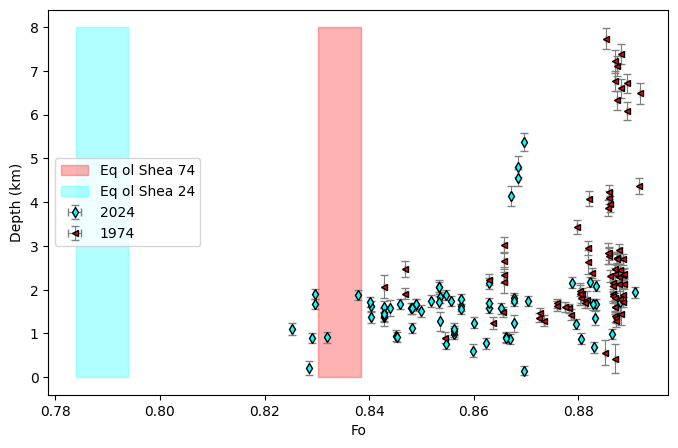

In [61]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))

# Calculate x coordinates
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')


ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')


ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
plt.legend()#
fig.savefig('FoDepth.png', dpi=300)

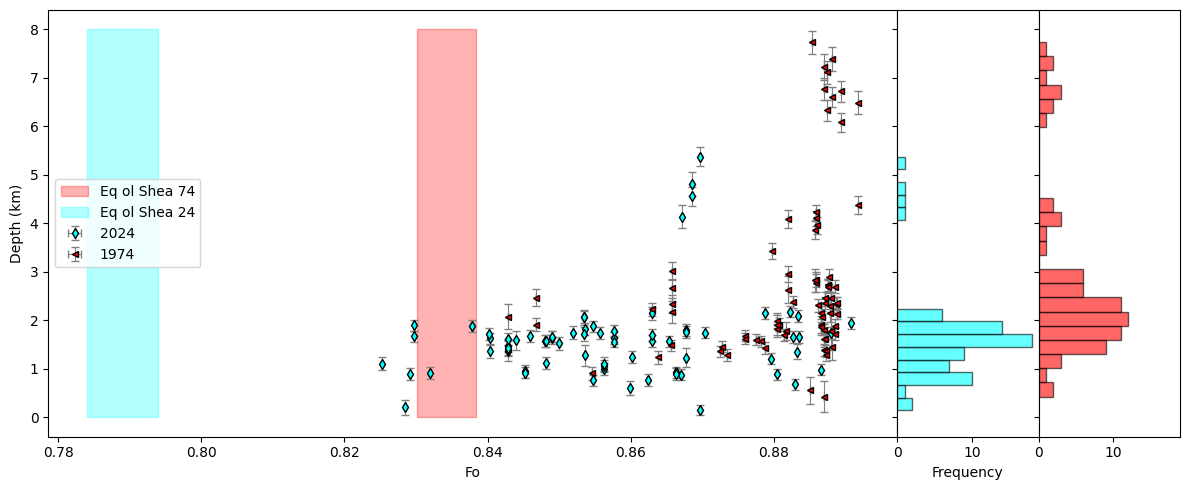

In [62]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars
ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()

In [87]:
df_merged=pd.merge(left=df_combo,right=MC_Av_rho_T_df_B,left_on='filename_4merge',right_on='Filename',suffixes=('_og', '_pwrecalc'))
# df_merged.to_clipboard(excel=True)

EBSD_tags=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/Raman+EDS+EBSDtags.xlsx')

df_wEBSDtags=pd.merge(left=df_merged,right=EBSD_tags,left_on='filename_4merge',right_on='filename_4merge')

df_wEBSDtags.to_clipboard(excel=True)

EBSD_data=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/EBSD_combined_all.xlsx')

df_wEBSDtags['EBSDname+grainID'] = df_wEBSDtags['EBSD_simple_name'].astype(str) +'_'+ df_wEBSDtags['EBSD_grainID'].astype(str)
EBSD_data['EBSDname+grainID'] = EBSD_data['EBSD_name'].astype(str) + '_'+ EBSD_data['grainID'].astype(str)

final_df=pd.merge(left=df_wEBSDtags,left_on='EBSDname+grainID',right=EBSD_data,right_on='EBSDname+grainID',suffixes=('_main', '_EBSDdata'),how='left')

##### Export fully merge data ####

final_df.to_excel("Final_data_wEBSD.xlsx")
final_df

In [64]:
EBSD_data=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/EBSD_combined_all.xlsx')

df_wEBSDtags['EBSDname+grainID'] = df_wEBSDtags['EBSD_simple_name'].astype(str) +'_'+ df_wEBSDtags['EBSD_grainID'].astype(str)
EBSD_data['EBSDname+grainID'] = EBSD_data['EBSD_name'].astype(str) + '_'+ EBSD_data['grainID'].astype(str)

final_df=pd.merge(left=df_wEBSDtags,left_on='EBSDname+grainID',right=EBSD_data,right_on='EBSDname+grainID',suffixes=('_main', '_EBSDdata'),how='left')

##### Export fully merge data ####

final_df.to_excel("Final_data_wEBSD.xlsx")
final_df

,Mount,filename,filename_4merge,Name_on_SEM,Notes regarding SEM matching,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,...,GB Length/Sqrt Size,Total GB length,Tilt length,Twist length,Perc Tilt,Perc Twist,Perc unclassified,Divangle,Deformed,Day_EBSDdata
0,A,K24_10_FIA,K24_10_FIA_index41,K24_10_FIA,NaN,0.048859,0.004082,0.001386,0.003840,102.873563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,K24_10_FIB,K24_10_FIB_index42,K24_10_FIB,NaN,0.056119,0.004361,0.002092,0.003826,102.891885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,K24_11_FIA,K24_11_FIA_index43,"K24_11_FIA,B",NaN,0.125982,0.004292,0.001919,0.003839,103.068198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,K24_11_FIB,K24_11_FIB_index44,"K24_11_FIA,B",NaN,0.085747,0.012513,0.011921,0.003801,102.966658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,K24_11_FIC,K24_11_FIC_index45,K24_11_FIC,NaN,0.129648,0.004284,0.001886,0.003846,103.077452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NaN,K24_40_FIA,K24_40_FIA_index166,K24_40_FIA,NaN,0.113685,0.004704,0.002748,0.003818,103.037164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,K24_40_FIB,K24_40_FIB_index167,K24_40_core,NaN,0.127505,0.004580,0.002494,0.003842,103.072041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,KL0919-013-A-rep2-6mW,KL0919-013-A-rep2-6mW_index147,KL0919_013_FIA,NaN,0.429251,0.005502,0.004975,0.002350,103.779896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,KL0919-013-B-rep2-6mW,KL0919-013-B-rep2-6mW_index148,KL0919_013_FIB,NaN,0.387546,0.003067,0.001973,0.002348,103.686032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
K24=final_df['filename'].str.contains('K24')
U919=final_df['filename'].str.contains('919')

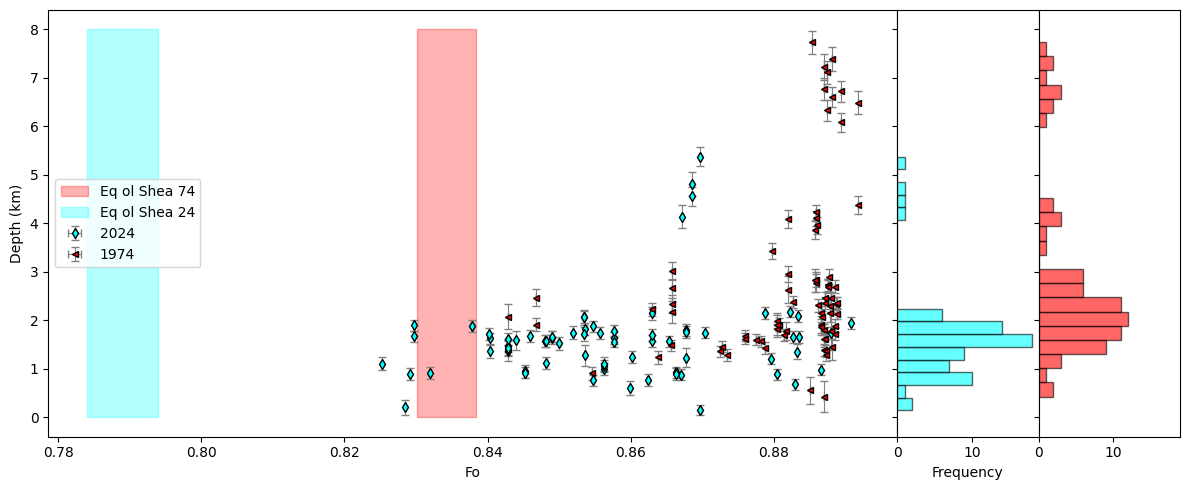

In [66]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Combine GOS values from both datasets
all_GOS = final_df['GOS']

# Global min and max of GOS
global_min_GOS = all_GOS.min()
global_max_GOS = all_GOS.max()

# Normalize GOS for marker sizing
normalized_GOS_K24 = (final_df['GOS'].loc[K24] - global_min_GOS) / (global_max_GOS - global_min_GOS)
normalized_GOS_U919 = (final_df['GOS'].loc[U919] - global_min_GOS) / (global_max_GOS - global_min_GOS)

# Scale marker sizes (e.g., between 5 and 15)
marker_size_K24 = 5 + 10 * normalized_GOS_K24
marker_size_U919 = 5 + 10 * normalized_GOS_U919

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars with marker sizes based on GOS
ax1.errorbar(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax1.errorbar(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(final_df['SingleCalc_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(final_df['SingleCalc_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()


In [86]:
final_df['GOS']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
Name: GOS, Length: 149, dtype: float64

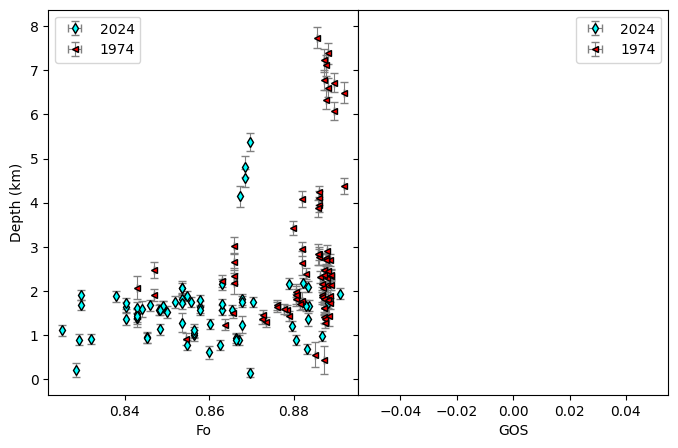

In [85]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (8,5),sharey=True)

ax1.errorbar(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax1.errorbar(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

ax2.errorbar(final_df['GOS'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax2.errorbar(final_df['GOS'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax2.set_xlabel('GOS')

ax2.legend()
plt.subplots_adjust(wspace=0) 

In [118]:
final_df[final_df['SingleCalc_D_km']>4][['filename','GOS','SingleCalc_D_km']]

,filename,GOS,SingleCalc_D_km
80,KL0919-008-A,0.554341,7.737790
90,KL0919-013-A,0.635922,6.771967
91,KL0919-013-B,0.635922,7.111117
92,KL0919-013-C,0.635922,6.719386
110,919_56_A,0.118908,4.229915
111,919_56_A_drift,0.118908,4.106109
112,919_58_A,0.266591,4.084473
116,919_60_A,0.428472,6.489178
122,919_65_A_rep1_12mW,NaN,6.605082
123,919_65_A_rep2_6mW,NaN,7.388014


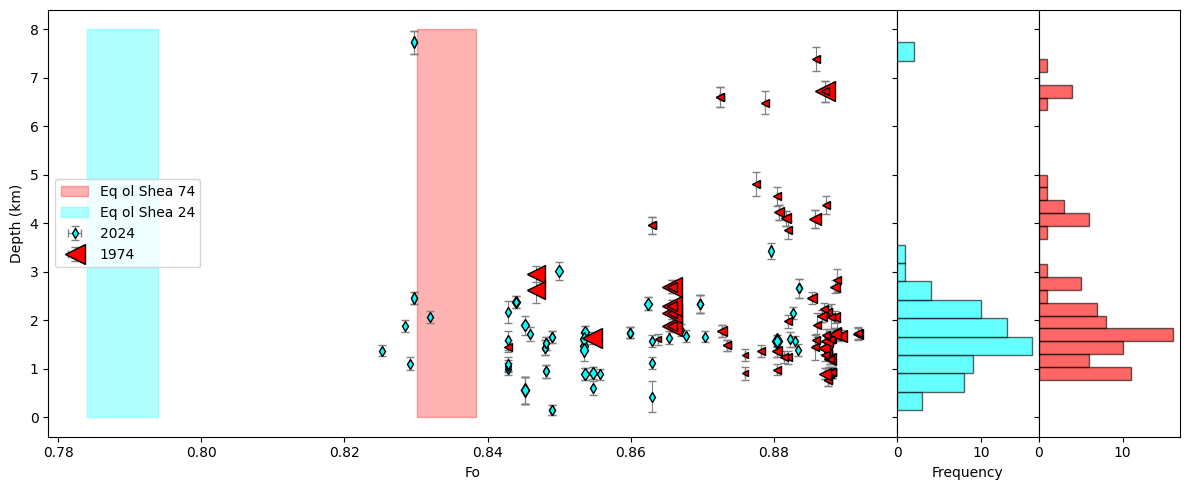

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Combine GOS values from both datasets
all_GOS = final_df['GOS']

# Global min and max of GOS
global_min_GOS = all_GOS.min()
global_max_GOS = all_GOS.max()

# Normalize GOS for marker sizing
normalized_GOS_K24 = (final_df['GOS'].loc[K24] - global_min_GOS) / (global_max_GOS - global_min_GOS)
normalized_GOS_U919 = (final_df['GOS'].loc[U919] - global_min_GOS) / (global_max_GOS - global_min_GOS)

# Scale marker sizes (e.g., between 5 and 15)
marker_size_K24 = 5 + 10 * normalized_GOS_K24
marker_size_U919 = 5 + 10 * normalized_GOS_U919

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars with marker sizes based on GOS
for i, (fo, depth, yerr, size) in enumerate(zip(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km_pwrecalc'].loc[K24], final_df['std_dev_MC_D_km_from_percentile_pwrecalc'].loc[K24], marker_size_K24)):
    ax1.errorbar(fo, depth, xerr=0, yerr=yerr, fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024' if i == 0 else "", ms=size)

for i, (fo, depth, yerr, size) in enumerate(zip(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km_pwrecalc'].loc[U919], final_df['std_dev_MC_D_km_from_percentile_pwrecalc'].loc[U919], marker_size_U919)):
    ax1.errorbar(fo, depth, xerr=0, yerr=yerr, fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974' if i == 0 else "", ms=size)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(final_df['SingleCalc_D_km_pwrecalc'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(final_df['SingleCalc_D_km_pwrecalc'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()


#### Below this are tests ###

/var/folders/r2/dcn33vbj1x1b46n5mm7vn9bc0000gn/T/ipykernel_8604/2525518762.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


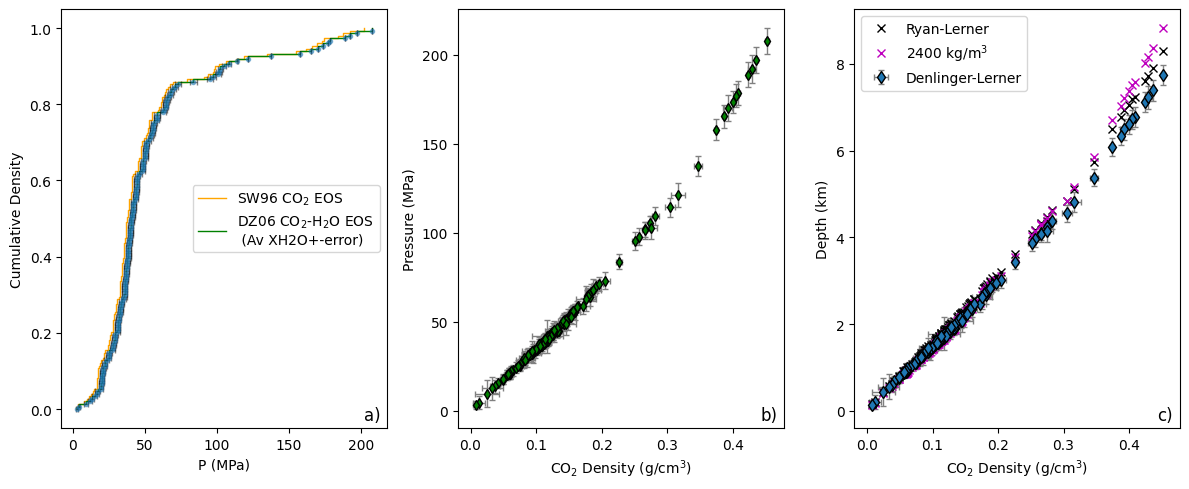

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))


## LETS SHOW A CDF FUNCTION OF THE PRESSURE DIFFERENCE - ITS SMALL ############

x1=100*P_DZ062['P_kbar_pureCO2_SW96']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='SW96 CO$_2$ EOS')

x1=100*P_DZ062['P_kbar_mixCO2_DZ06_Hloss']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='green', linewidth=1, label='DZ06 CO$_2$-H$_2$O EOS \n (Av XH2O+-error)')
plt.legend()

x2=100*P_DZ06_MinXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x2_sorted=np.sort(x2)
# ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
#          np.arange(x2_sorted.size+1)/x2_sorted.size, color='red', linewidth=1, linestyle='-', label='DZ06')
y = np.arange(x1_sorted.size + 1) / x1_sorted.size  # Cumulative probability for each step


x3=100*P_DZ06_MaxXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x3_sorted=np.sort(x3)
# ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
#          np.arange(x3_sorted.size+1)/x3_sorted.size, color='blue', linewidth=1, linestyle='-', label='DZ06')
ax1.legend()
ax1.set_xlabel('P (MPa)')
ax1.set_ylabel('Cumulative Density')


error = np.full_like(x1_sorted, 5)  # Replace 5 with your actual error values

# Adding horizontal error bars - notice 'fmt='none'' for no central marker, adjust 'ecolor' and 'elinewidth' as needed
ax1.errorbar(x1_sorted, y[:-1], xerr=[x3_sorted-x1_sorted, x1_sorted-x2_sorted], fmt='o', ms=3, ecolor='k', capsize=2, elinewidth=1, alpha=0.5)


ax2.plot()

ax2.errorbar(df_combo['Density g/cm3'], 100*MC_Av_rho_T_df_B['SingleCalc_Press_kbar'], 
             xerr=df_combo['σ Density g/cm3'], yerr=100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'],
               fmt='d', mec='k',ecolor='grey', mfc='green', ms=5, capsize=2, elinewidth=1, alpha=1)

ax2.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax2.set_ylabel('Pressure (MPa)')


# Lets show different density-depth models

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
Depth_2400=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], crust_dens_kgm3=2400)

ax3.errorbar(df_combo['Density g/cm3'], MC_Av_rho_T_df_B['SingleCalc_D_km'], 
             xerr=df_combo['σ Density g/cm3'], yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'],
               fmt='d', mec='k',  ecolor='grey', capsize=2, elinewidth=1, alpha=1, label='Denlinger-Lerner')

ax3.plot(df_combo['Density g/cm3'], Depth_RL, 'xk', label='Ryan-Lerner')
ax3.plot(df_combo['Density g/cm3'], Depth_2400, 'xm', label='2400 kg/m$^{3}$')
ax3.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax3.set_ylabel('Depth (km)')
ax3.legend()
fig.tight_layout()

ax1.annotate("a)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax2.annotate("b)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax3.annotate("c)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
fig.savefig('Errors_2022FI.png', dpi=200)

In [55]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.1512147049414154

In [56]:

np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])*100

3.8183790524079484

In [57]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.1512147049414154

In [58]:
df_combo_clip=df_combo.copy()
# Lets strip out the columns we dont want.
df_combo_clip = df_combo_clip[[col for col in df_combo_clip.columns if not any(x in col for x in
                             ['Unnamed', 'cpxprim', 'Fo content (mol%)',  '_y', 'Preferred D_σ_Ne',
                              'Preferred D_σ_pkfit', 'HighD_RT', 'LowD_RT', '_SC'
                              ])]]





In [59]:
df_combo_clip.to_clipboard(excel=True, index=False)

In [60]:
df_combo_clip.columns[100:200]

Index(['Mean_MC_D_km', 'Med_MC_D_km', 'std_dev_MC_D_km',
       'std_dev_MC_D_km_from_percentile', 'T_K_input', 'error_T_K',
       'CO2_dens_gcm3_input', 'error_CO2_dens_gcm3', 'crust_dens_kgm3_input',
       'error_crust_dens_kgm3', 'model', 'EOS', 'XH2O_input', 'error_XH2O',
       'Total_wt%', 'Total_Oxide%', 'Al2O3', 'CaO', 'Cr2O3', 'FeOt', 'MgO',
       'MnO', 'NiO', 'SiO2', 'TiO2', 'Oxide % Sigma_Al2O3',
       'Oxide % Sigma_CaO', 'Oxide % Sigma_Cr2O3', 'Oxide % Sigma_FeOt',
       'Oxide % Sigma_MgO', 'Oxide % Sigma_MnO', 'Oxide % Sigma_NiO',
       'Oxide % Sigma_SiO2', 'Oxide % Sigma_TiO2', 'Al2O3_norm', 'CaO_norm',
       'Cr2O3_norm', 'FeOt_norm', 'MgO_norm', 'MnO_norm', 'NiO_norm',
       'SiO2_norm', 'TiO2_norm', 'Wt%_Al', 'Wt%_Ca', 'Wt%_Cr', 'Wt%_Fe',
       'Wt%_Mg', 'Wt%_Mn', 'Wt%_Ni', 'Wt%_O', 'Wt%_Si', 'Wt%_Ti',
       'Wt% Sigma_Al', 'Wt% Sigma_Ca', 'Wt% Sigma_Cr', 'Wt% Sigma_Fe',
       'Wt% Sigma_Mg', 'Wt% Sigma_Mn', 'Wt% Sigma_Ni', 'Wt% Sigma_Si',
       'Wt% Si

In [61]:
MC_Av_rho_T_df_B.to_clipboard(excel=True, index=False)

In [62]:
np.nanmedian(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.12665081322074778

(array([60., 42., 10., 13.,  4., 10.,  7.,  2.,  0.,  1.]),
 array([2.32542797, 3.04277271, 3.76011745, 4.47746219, 5.19480693,
        5.91215167, 6.62949641, 7.34684115, 8.06418589, 8.78153063,
        9.49887537]),
 <BarContainer object of 10 artists>)

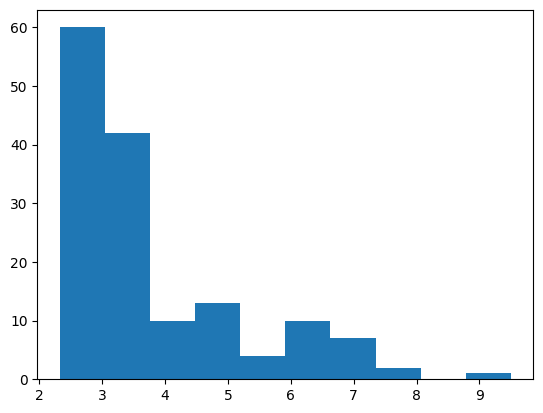

In [63]:
plt.hist(100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])

In [64]:
MC_Av_rho_T_df_B.columns[0:100]

Index(['Filename', 'i', 'CO2_density_input', 'SingleCalc_D_km',
       'SingleCalc_Press_kbar', 'Mean_MC_P_kbar', 'Med_MC_P_kbar',
       'std_dev_MC_P_kbar', 'std_dev_MC_P_kbar_from_percentile',
       'Mean_MC_D_km', 'Med_MC_D_km', 'std_dev_MC_D_km',
       'std_dev_MC_D_km_from_percentile', 'T_K_input', 'error_T_K',
       'CO2_dens_gcm3_input', 'error_CO2_dens_gcm3', 'crust_dens_kgm3_input',
       'error_crust_dens_kgm3', 'model', 'EOS', 'XH2O_input', 'error_XH2O',
       'crystal'],
      dtype='object')

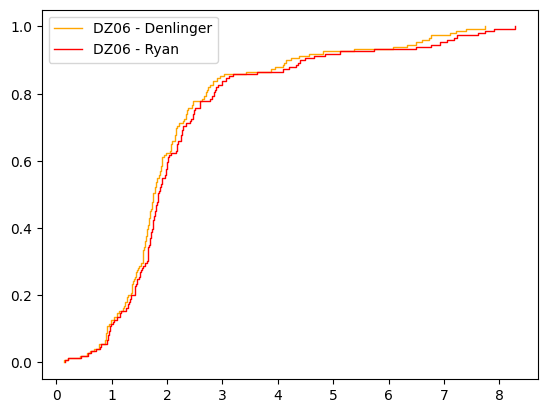

In [65]:
Depth_DL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='denlinger_lerner')
x1=Depth_DL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='DZ06 - Denlinger')

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
x1=Depth_RL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='red', linewidth=1, label='DZ06 - Ryan')
plt.legend()